     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=15cb047b49b240ac170fa1d5c4241e316e8c8f94e05166051ecc362242a4f266
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
Irrigation Level:  86.11111111111111


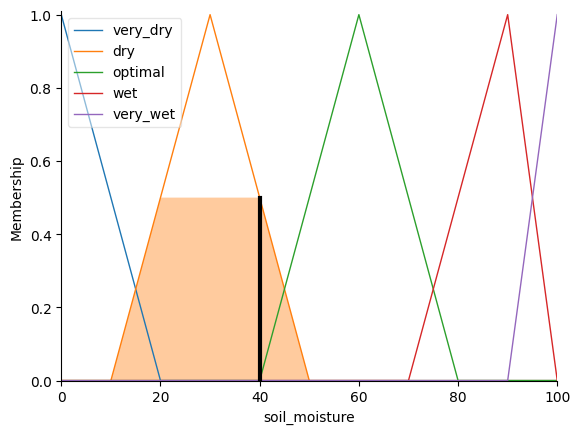

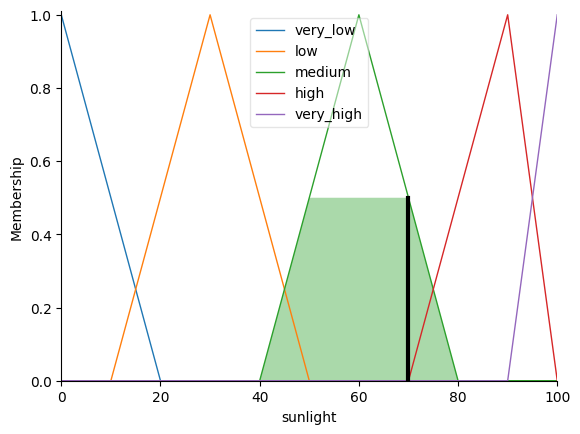

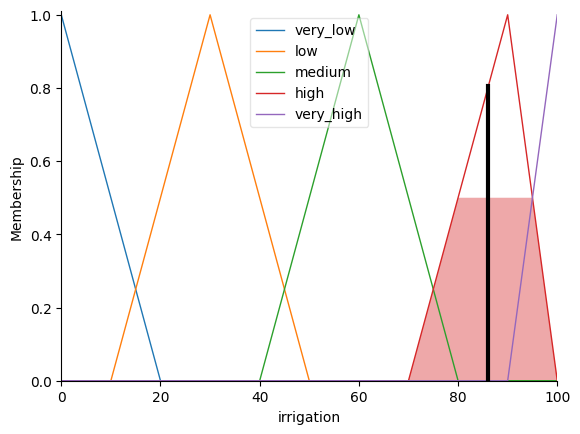

In [1]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Step 1: Define the fuzzy sets for input variables (soil moisture and sunlight)
soil_moisture = ctrl.Antecedent(np.arange(0, 101, 1), 'soil_moisture')
sunlight = ctrl.Antecedent(np.arange(0, 101, 1), 'sunlight')

# Membership functions for soil moisture (0% to 100%)
soil_moisture['very_dry'] = fuzz.trimf(soil_moisture.universe, [0, 0, 20])
soil_moisture['dry'] = fuzz.trimf(soil_moisture.universe, [10, 30, 50])
soil_moisture['optimal'] = fuzz.trimf(soil_moisture.universe, [40, 60, 80])
soil_moisture['wet'] = fuzz.trimf(soil_moisture.universe, [70, 90, 100])
soil_moisture['very_wet'] = fuzz.trimf(soil_moisture.universe, [90, 100, 100])

# Membership functions for sunlight (0% to 100%)
sunlight['very_low'] = fuzz.trimf(sunlight.universe, [0, 0, 20])
sunlight['low'] = fuzz.trimf(sunlight.universe, [10, 30, 50])
sunlight['medium'] = fuzz.trimf(sunlight.universe, [40, 60, 80])
sunlight['high'] = fuzz.trimf(sunlight.universe, [70, 90, 100])
sunlight['very_high'] = fuzz.trimf(sunlight.universe, [90, 100, 100])

# Step 2: Define the fuzzy sets for output variable (irrigation)
irrigation = ctrl.Consequent(np.arange(0, 101, 1), 'irrigation')

# Membership functions for irrigation (0% to 100%)
irrigation['very_low'] = fuzz.trimf(irrigation.universe, [0, 0, 20])
irrigation['low'] = fuzz.trimf(irrigation.universe, [10, 30, 50])
irrigation['medium'] = fuzz.trimf(irrigation.universe, [40, 60, 80])
irrigation['high'] = fuzz.trimf(irrigation.universe, [70, 90, 100])
irrigation['very_high'] = fuzz.trimf(irrigation.universe, [90, 100, 100])

# Step 3: Define the fuzzy rules
rule1 = ctrl.Rule(soil_moisture['very_dry'] & sunlight['very_low'], irrigation['medium'])
rule2 = ctrl.Rule(soil_moisture['very_dry'] & sunlight['low'], irrigation['high'])
rule3 = ctrl.Rule(soil_moisture['very_dry'] & sunlight['medium'], irrigation['very_high'])
rule4 = ctrl.Rule(soil_moisture['very_dry'] & sunlight['high'], irrigation['very_high'])
rule5 = ctrl.Rule(soil_moisture['very_dry'] & sunlight['very_high'], irrigation['very_high'])

rule6 = ctrl.Rule(soil_moisture['dry'] & sunlight['very_low'], irrigation['low'])
rule7 = ctrl.Rule(soil_moisture['dry'] & sunlight['low'], irrigation['medium'])
rule8 = ctrl.Rule(soil_moisture['dry'] & sunlight['medium'], irrigation['high'])
rule9 = ctrl.Rule(soil_moisture['dry'] & sunlight['high'], irrigation['very_high'])
rule10 = ctrl.Rule(soil_moisture['dry'] & sunlight['very_high'], irrigation['very_high'])

rule11 = ctrl.Rule(soil_moisture['optimal'] & sunlight['very_low'], irrigation['very_low'])
rule12 = ctrl.Rule(soil_moisture['optimal'] & sunlight['low'], irrigation['low'])
rule13 = ctrl.Rule(soil_moisture['optimal'] & sunlight['medium'], irrigation['medium'])
rule14 = ctrl.Rule(soil_moisture['optimal'] & sunlight['high'], irrigation['high'])
rule15 = ctrl.Rule(soil_moisture['optimal'] & sunlight['very_high'], irrigation['high'])

rule16 = ctrl.Rule(soil_moisture['wet'] & sunlight['very_low'], irrigation['very_low'])
rule17 = ctrl.Rule(soil_moisture['wet'] & sunlight['low'], irrigation['very_low'])
rule18 = ctrl.Rule(soil_moisture['wet'] & sunlight['medium'], irrigation['low'])
rule19 = ctrl.Rule(soil_moisture['wet'] & sunlight['high'], irrigation['medium'])
rule20 = ctrl.Rule(soil_moisture['wet'] & sunlight['very_high'], irrigation['medium'])

rule21 = ctrl.Rule(soil_moisture['very_wet'] & sunlight['very_low'], irrigation['very_low'])
rule22 = ctrl.Rule(soil_moisture['very_wet'] & sunlight['low'], irrigation['very_low'])
rule23 = ctrl.Rule(soil_moisture['very_wet'] & sunlight['medium'], irrigation['very_low'])
rule24 = ctrl.Rule(soil_moisture['very_wet'] & sunlight['high'], irrigation['low'])
rule25 = ctrl.Rule(soil_moisture['very_wet'] & sunlight['very_high'], irrigation['low'])

# Step 4: Implement the fuzzy inference system
irrigation_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5,
    rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15,
    rule16, rule17, rule18, rule19, rule20,
    rule21, rule22, rule23, rule24, rule25
])
irrigation_sim = ctrl.ControlSystemSimulation(irrigation_ctrl)

# Step 5: Test the fuzzy logic system with sample inputs
irrigation_sim.input['soil_moisture'] = 40  # dry soil moisture
irrigation_sim.input['sunlight'] = 70  # high sunlight

irrigation_sim.compute()

print("Irrigation Level: ", irrigation_sim.output['irrigation'])

# Visualize the result
soil_moisture.view(sim=irrigation_sim)
sunlight.view(sim=irrigation_sim)
irrigation.view(sim=irrigation_sim)